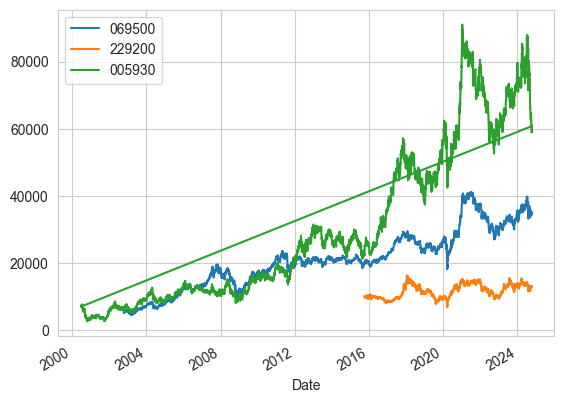

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

import win32com.client as win32


price_df = fdr.DataReader('069500, 229200, 005930')

sns.set_style('whitegrid')
price_df.plot()
plt.show()

In [43]:
def load_allstock_KRX():
    # # KRX site에서 제공하는 상장법인목록 load
    # krx_url = 'https://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13'
    # stk_data = pd.read_html(krx_url, header=0)[0]  # 해당 site에서 table 추출 및 header는 가장 첫번째 행
    fname = './data/상장법인목록.xls'
    excel = win32.gencache.EnsureDispatch('Excel.Application')
    wb = excel.Workbooks.Open(fname)
    wb.SaveAs(fname+'x', FileFormat = 56)
    wb.Close()
    excel.Application.Quit()
    
    stk_data = pd.read_excel('./data/상장법인목록.xlsx')
    stk_data = stk_data[['회사명', '종목코드']]     # 9개의 열 중 '회사명', '종목코드' 만 추출하여 dataframe 완성
    stk_data = stk_data.rename(columns={'회사명': 'Name', '종목코드': 'Code'})
                                                   # column 명을 한글에서 영어로 바꿈
    
    # 종목코드가 모두 6자리로 이루어져있지만 혹시 모르니, 6자리 미만 코드는 앞에 0을 채워넣어
    # 6자리 숫자텍스트로 변환
    stk_data['Code'] = stk_data['Code'].apply(lambda input: '0' * (6 - len(str(input))) + str(input))
                                   
    return stk_data

In [44]:
df_stock = load_allstock_KRX()
print(df_stock)         # 위의 5행 print

com_error: (-2147221005, '잘못된 클래스 문자열입니다.', None, None)